In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

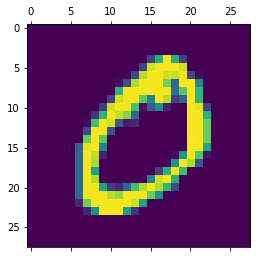

In [9]:
plt.matshow(x_train[1])

In [10]:
y_train[2]

4

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
x_train_flattened.shape

(60000, 784)

In [15]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.4714 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3038 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2729 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2666 - accuracy: 0.9256


In [17]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2681 - accuracy: 0.9252


[0.2681376338005066, 0.9251999855041504]

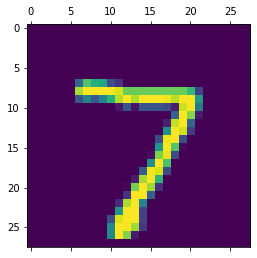

In [18]:
plt.matshow(x_test[0])

In [19]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.6715875e-02, 3.2555030e-07, 3.6471814e-02, 9.5361280e-01,
       1.6830862e-03, 8.7036282e-02, 8.4890979e-07, 9.9974763e-01,
       9.7246796e-02, 5.9763682e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    3,    1,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   9,    9,  925,   17,    8,    3,   11,   10,   38,    2],
       [   5,    0,   20,  915,    0,   28,    2,   12,   23,    5],
       [   2,    1,    6,    2,  924,    0,    5,    3,   10,   29],
       [  12,    3,    5,   29,   12,  778,   11,    5,   32,    5],
       [  16,    3,    8,    1,    8,   14,  904,    2,    2,    0],
       [   1,    5,   24,    6,    9,    0,    0,  953,    4,   26],
       [   8,    7,    6,   17,    9,   29,    8,   12,  872,    6],
       [  12,    7,    1,   10,   37,    6,    0,   26,    9,  901]])>

Text(69.0, 0.5, 'Truth')

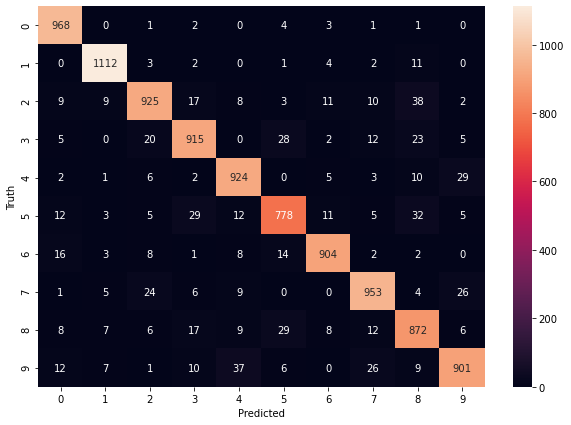

In [31]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2687 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1247 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0889 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0688 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0533 - accuracy: 0.9836


In [33]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0881 - accuracy: 0.9743


[0.08806856721639633, 0.9743000268936157]

Text(69.0, 0.5, 'Truth')

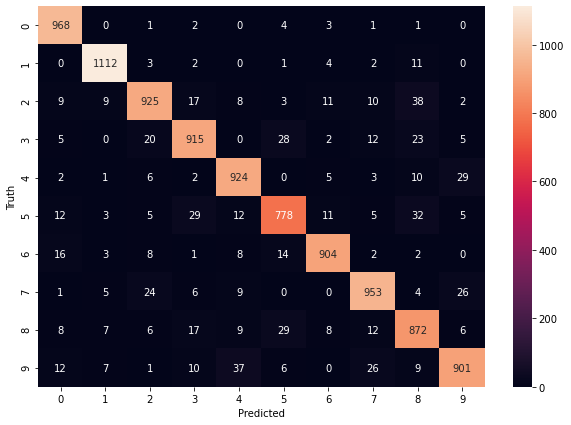

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2751 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1247 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0866 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0666 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0525 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0427 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0293 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0250 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [37]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0841 - accuracy: 0.9773


[0.08408425748348236, 0.9772999882698059]

Text(69.0, 0.5, 'Truth')

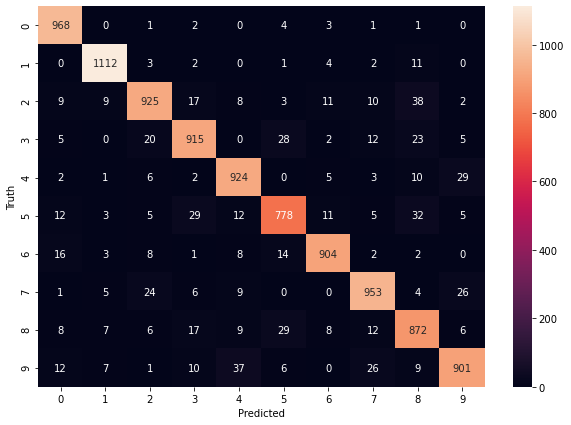

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')